### Урок 4. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [222]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
import matplotlib.pyplot as plt

boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target

In [213]:
def my_regressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    sgd_regressor = SGDRegressor(learning_rate='constant', fit_intercept=True, eta0 = 0.0001, random_state =42) 
    w_current = np.random.random(X_train.shape[1])
    epsilon = 0.0001
    weight_evolution, r2score_evolution =[],[]
    for step in list(range(800)):
        sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
        weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
        if weight_evolution[-1]<epsilon:
            print("Итарации остановлены на шаге %d" % step); 
            break
        r2score_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test)))
        w_current = sgd_regressor.coef_.copy()
    
    if weight_evolution[-1]>epsilon:
        print("Алгоритм не сошелся шаг %d weight_evolution %f" % (step, weight_evolution[-1]))
        step+=1
    
    plt.plot(range(step), r2score_evolution)
    print("r2-score %f" % r2_score(y_test, sgd_regressor.predict(X_test)))

Алгоритм не сошелся шаг 799 weight_evolution 73829661091.645447
r2-score -3705250042287336099676160.000000


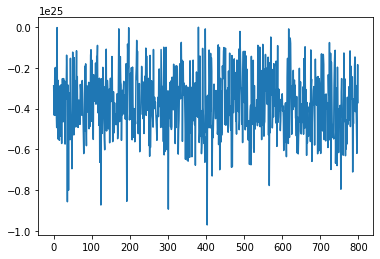

In [215]:
my_regressor(X, y)

Алгоритм не сошелся. Попробуем поиграть с входными данными.

0


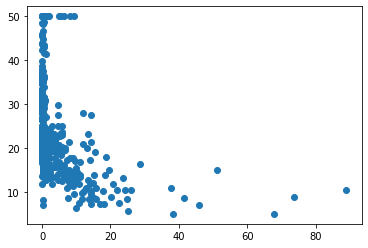

1


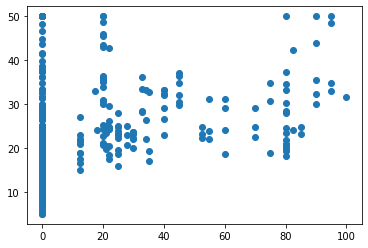

2


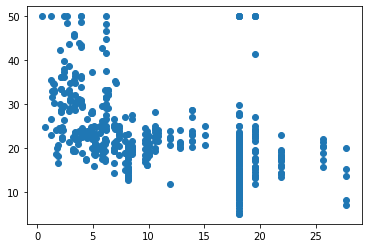

3


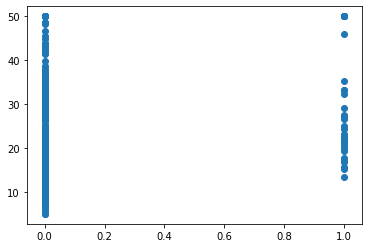

4


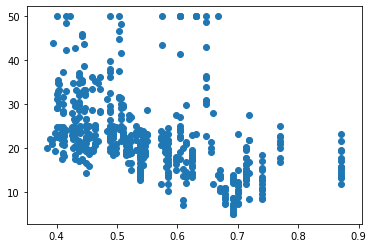

5


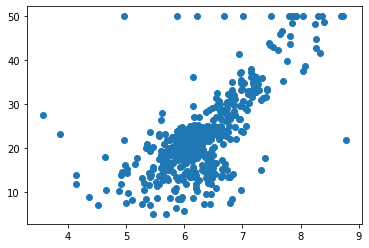

6


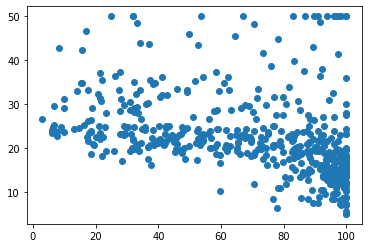

7


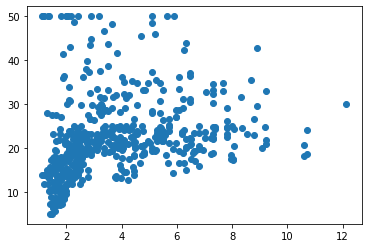

8


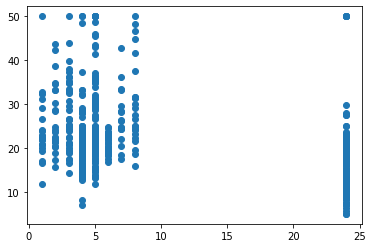

9


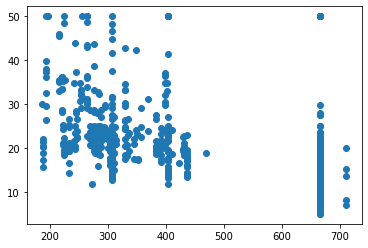

10


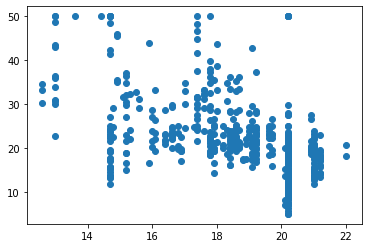

11


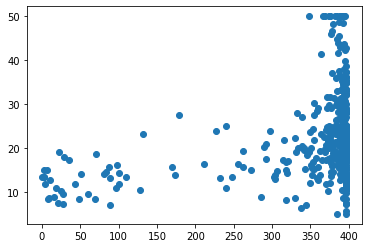

12


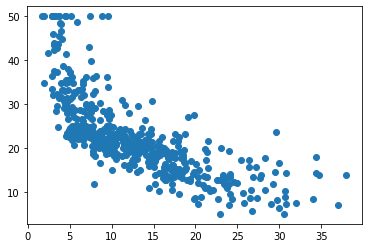

In [239]:
boston_dataset = load_boston()
X = boston_dataset.data
for i in range(0, X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()
#plt.legend(range(0, X.shape[1]))
#plt.show()
#X = np.delete(X,[0, 1, 6, 9,11],axis=1)
X = np.delete(X,[ 9, 11],axis=1)

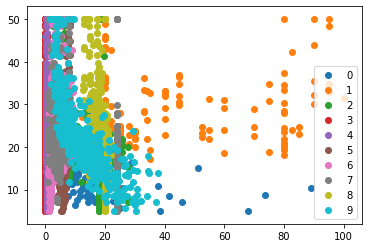

In [237]:
for i in range(0, X.shape[1]):
    plt.scatter(X[:,i], y)
plt.legend(range(0, X.shape[1]))
plt.show()

Алгоритм не сошелся шаг 799 weight_evolution 0.000701
r2-score 0.625287


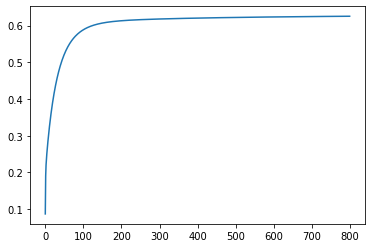

In [240]:
my_regressor(X, y)

Если использовать все фичи, то алгоритм не сходится вообще. Если некоторые фичи убрать, то получается что-то более мнеее адекватное. Но при epsilon = 0.0001 не сходится всё равно, хотя удалось снизить ошибку r2-score до 0.625. Но возникает вопрос как понять какие фичи убрать. Я убрал те которые с самыми большими значениями.

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.